In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
ITERATIONS = 10
algos = ['RLS', '(1+1)-EA', '(1+2)-EA', '(1+10)-EA', '(1+20)-EA', '(1+50)-EA']
iter_cols = ['iteration-' + str(1 + i) for i in range(ITERATIONS)]

In [36]:
df = pd.read_csv('results.csv')
df['mean'] = df[iter_cols].sum(axis=1) / ITERATIONS
df

,algorithm,test-function,n,iteration-1,iteration-2,iteration-3,iteration-4,iteration-5,iteration-6,iteration-7,iteration-8,iteration-9,iteration-10,mean
0,RLS,one_max,25,87,51,88,126,57,57,48,77,38,56,68.5
1,RLS,one_max,50,223,131,163,178,255,165,146,336,165,178,194.0
2,RLS,one_max,75,314,219,186,203,320,399,497,250,260,467,311.5
3,RLS,jump,25,76,1069,72,1706,177,2839,2438,2363,2871,2379,1599.0
4,RLS,jump,50,13703,88223,55722,6005,1456,9237,2406,8985,846,6262,19284.5
5,RLS,jump,75,45475,52817,10629,26812,261765,50861,119514,124062,62154,5000,75908.9
6,RLS,bin_val,25,45,48,108,68,54,120,47,63,61,58,67.2
7,RLS,bin_val,50,145,162,282,139,169,105,238,175,182,255,185.2
8,RLS,bin_val,75,356,359,282,221,321,205,305,615,220,296,318.0
9,RLS,royal_roads,25,80,140,331,548,281,655,366,428,527,360,371.6


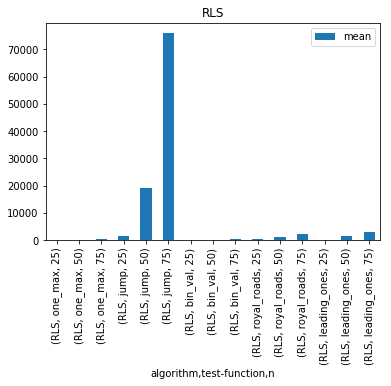

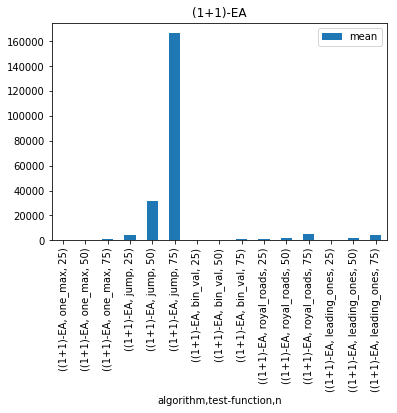

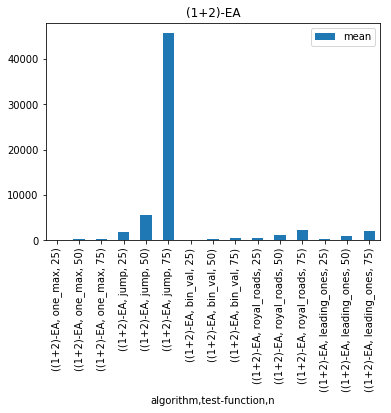

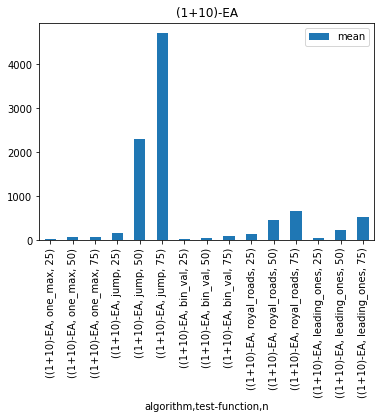

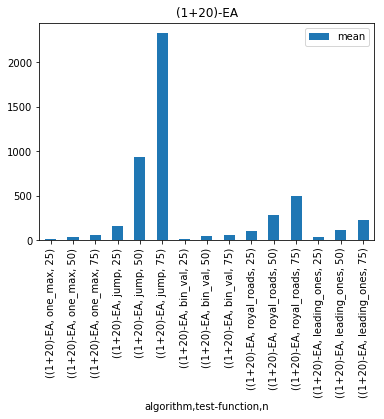

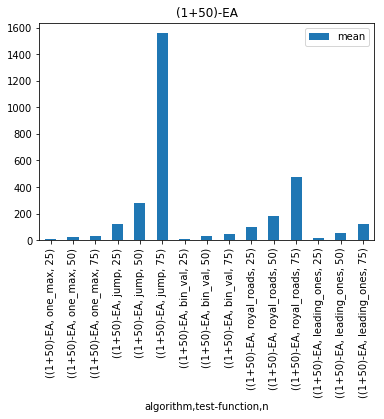

In [75]:
for algo_name in algos:
    df.set_index(['algorithm', 'test-function', 'n']).xs(level='algorithm', key=algo_name, drop_level=False)[['mean']].plot.bar(title=algo_name,)
    plt.show()

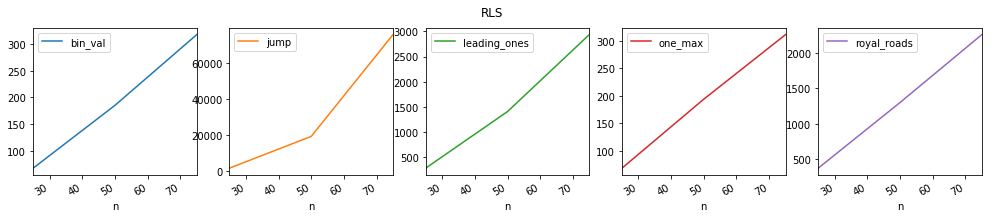

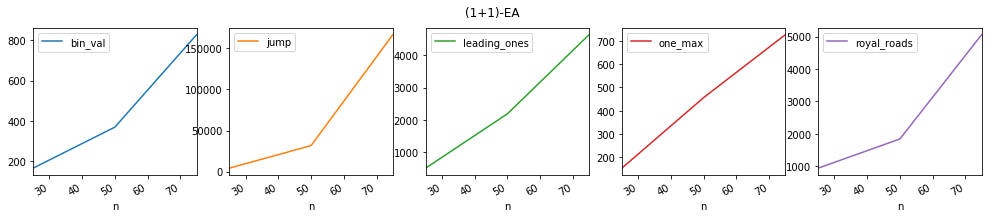

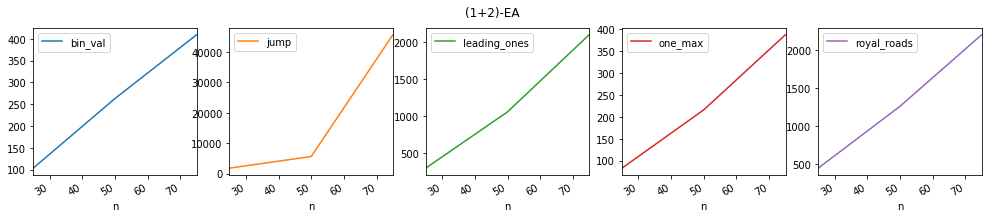

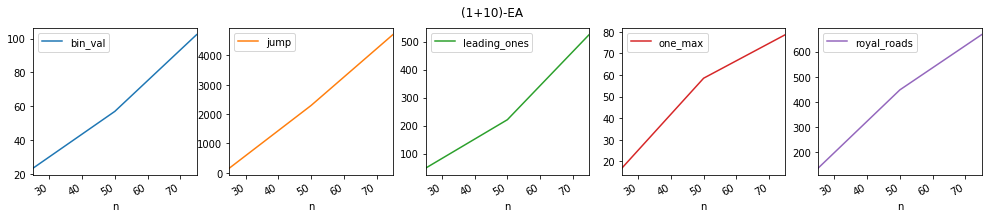

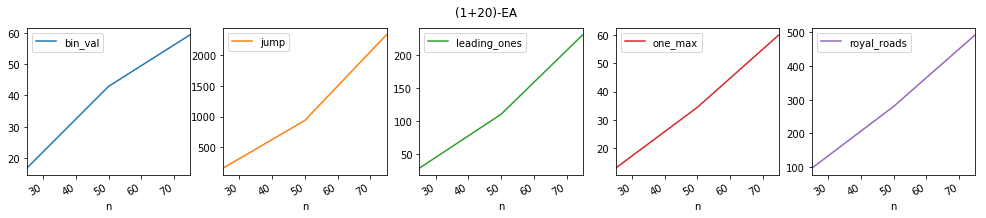

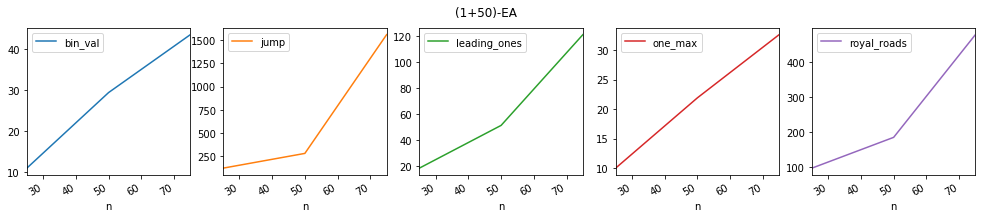

In [69]:
for algo_name in algos:
    df_algo = df[df['algorithm'] == algo_name]
    pivot = pd.pivot_table(df_algo,
                           values='mean',
                           index=['n'],
                           columns='test-function')
    pivot.plot(subplots=True, layout=(1,5), figsize=(17,3), title=algo_name)
    plt.show()